# Использование библиотек Python для визуализации. Библиотека `Seaborn`

## Начало работы

Импортируем необходимые для работы библиотеки и считаем файл, содержащий данные, сразу же проверим типы столбцов.

In [1]:
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
# superstore_data = pd.read_excel('superstore.xlsx', parse_dates=['Order Date', 'Ship Date'])
superstore_data = pd.read_csv('superstore.csv', parse_dates=['Order Date', 'Ship Date'])
superstore_data.dtypes

ModuleNotFoundError: No module named 'seaborn'

## Построение столбчатой диаграммы



*   Для построения столбчатой диаграммы воспользуемся функцией `catplot()`.
*   Зададим название осей — функция `set_axis_labels()`.
*   Пропишем легенду — `legend.set_title()`.
*   Сохраним график в svg-формате, используя функции более низкоуровневой библиотеке `matplotlib`. Изображение будет находится в вашей рабочей папке.

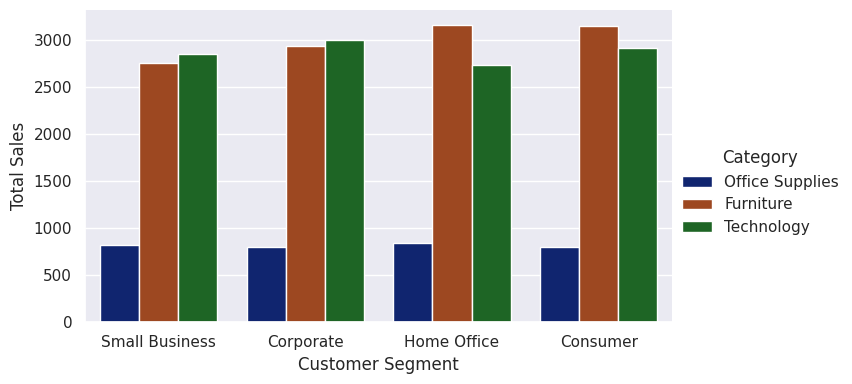

In [9]:
g = sns.catplot(
    data=superstore_data, 
    kind="bar",
    x="Customer Segment", 
    y="Sales", 
    hue="Product Category", 
    palette="dark", 
    height=4, 
    aspect=16/9,
    errorbar=None
)

g.set_axis_labels("Customer Segment", "Total Sales")
g.legend.set_title("Category")
pyplot.savefig('seaborn-plot.svg')

## Построение линейного графика

Построим линейный график — распределение продаж по дням.

Перед построением выполним подготовительные действия. 
*   Проведем агрегацию данных по дате и категории товаров, используя функцию библиотеки `Pandas` — `groupby()`. Агрегатной функцией будет функция суммирования sum(). Далее мы перестроим индекс для того, чтобы датафрейм содержал нужные нам столбцы `Order Date` и `Product Category`.


In [10]:
data = superstore_data[["Order Date", 'Sales', 'Product Category']].groupby(
    ['Order Date', 'Product Category']
).aggregate(sum).reset_index()
data.head()

,Order Date,Product Category,Sales
0,2009-01-01,Office Supplies,1052.84
1,2009-01-02,Furniture,5322.25
2,2009-01-02,Office Supplies,5779.62
3,2009-01-03,Furniture,960.76
4,2009-01-03,Office Supplies,504.06


Перестроим таблицу таким образом, чтобы столбец `Product Category` был разбит на несколько (по значениям, содержащимся в этом столбце), значения в новых столбцах будут взяты из столбца `Sales`. Нулями будут заполнены значения, где нет продаж (мы сделали это, используя функцию `fillna`).

In [11]:
data_flattened = pd.pivot(
    data, 
    index=['Order Date'], 
    columns=['Product Category'], 
    values='Sales'
).reset_index().fillna(0)
data_flattened

Product Category,Order Date,Furniture,Office Supplies,Technology
0,2009-01-01,0.00,1052.84,0.0000
1,2009-01-02,5322.25,5779.62,0.0000
2,2009-01-03,960.76,504.06,30533.0355
3,2009-01-04,1039.56,214.69,0.0000
4,2009-01-05,28011.40,1171.57,10551.4340
...,...,...,...,...
1413,2012-12-26,0.00,351.41,0.0000
1414,2012-12-27,759.94,16476.09,3883.4715
1415,2012-12-28,0.00,2721.18,0.0000
1416,2012-12-29,3711.04,13226.93,1936.4500


Воспользуемся функцией библиотеки `Seaborn` для построения линейного графика — `lineplot`. Функция `set()` выставляет параметры графика.


<Axes: xlabel='Order Date', ylabel='Technology'>

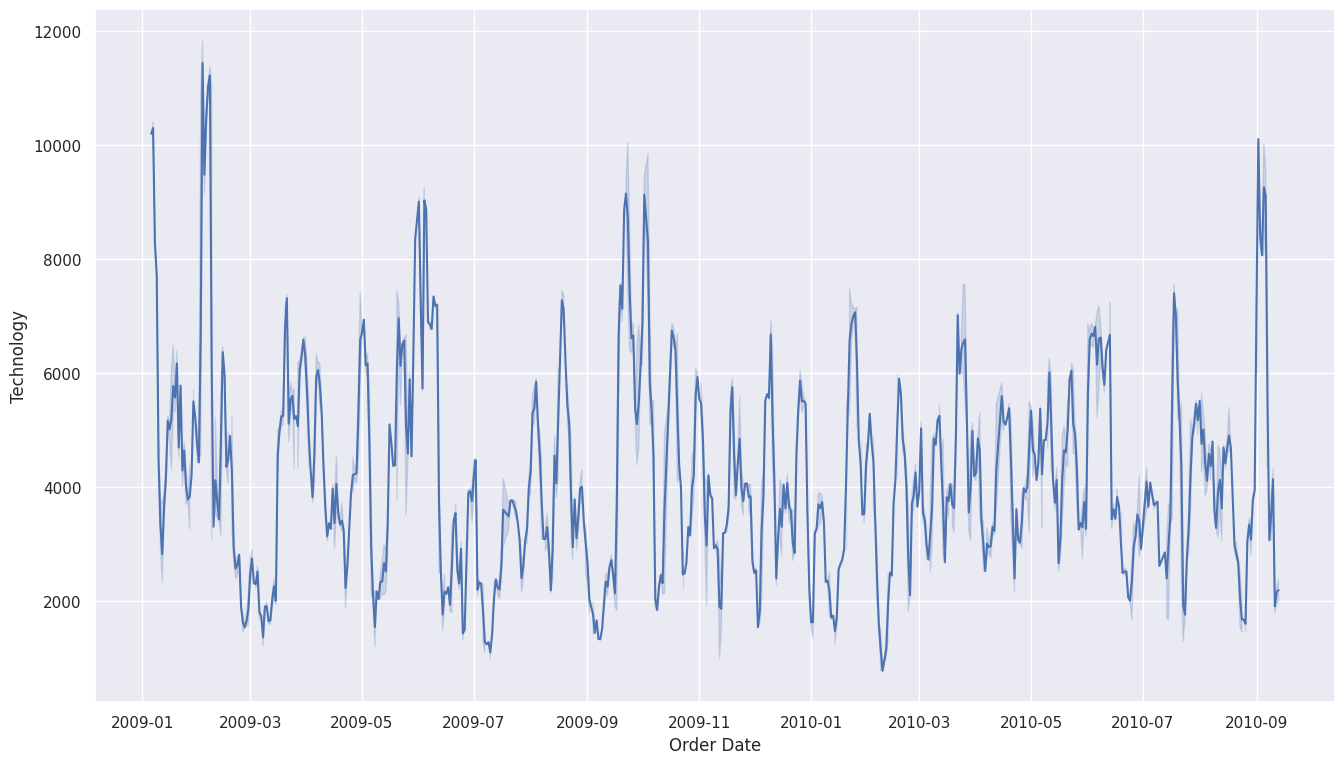

In [12]:
sns.set(rc = {'figure.figsize':(16,9)})
sns.lineplot(
    x=data['Order Date'], 
    y=data_flattened['Technology'].rolling(14).mean(),
)

Чтобы сгладить график, воспользуемся функцией скользящего среднего.


<Axes: xlabel='Order Date', ylabel='Technology'>

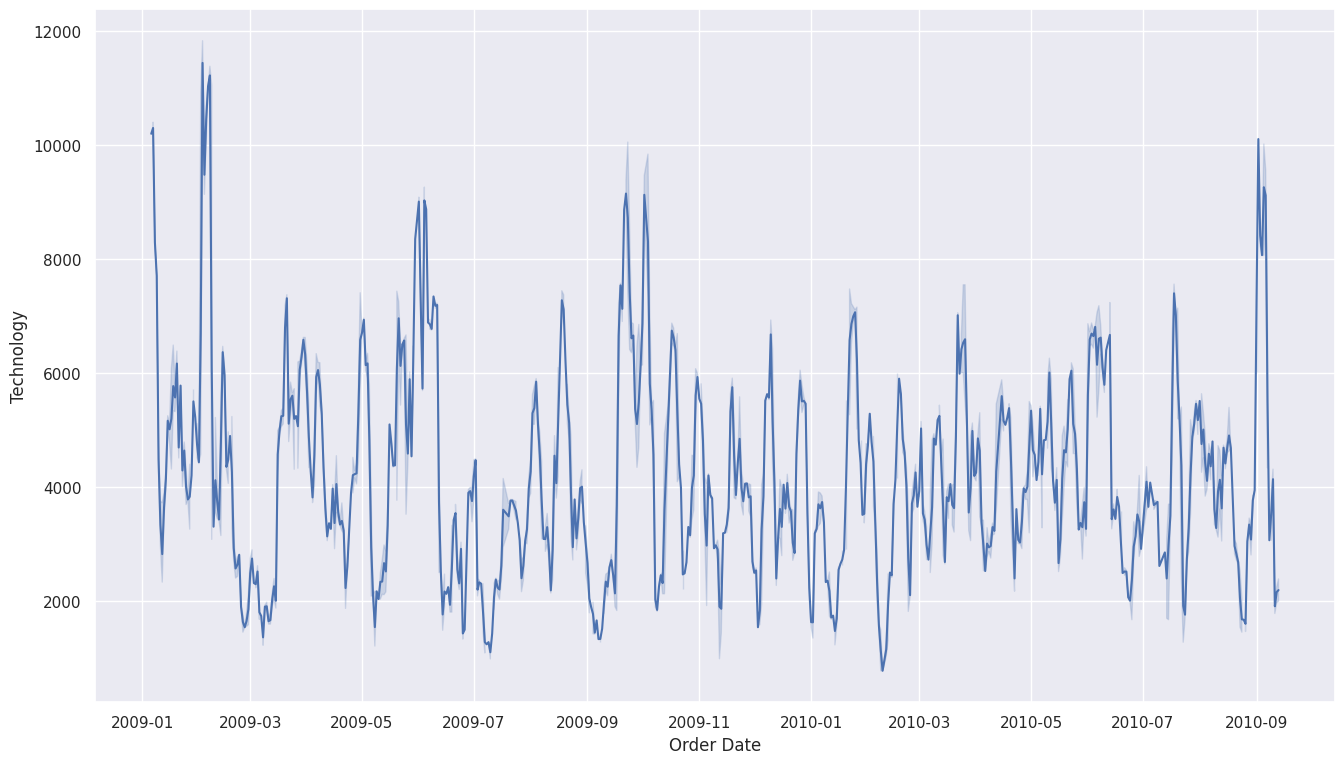

In [7]:
sns.set(rc = {'figure.figsize':(16,9)})
sns.lineplot(
    x=data['Order Date'], 
    y=data_flattened['Technology'].rolling(14).mean(),
)

Построим график сравнения распределений – `violinplot`. Мы разобьем данные по покупательскому сегменту, изображать мы будем распределение продаж. Дополнительно внутри каждого сегмента мы разобьем данные по категории товаров. Из категорий товаров мы возьмем только две `Technology` и `Furniture`.

<Axes: xlabel='Customer Segment', ylabel='Sales'>

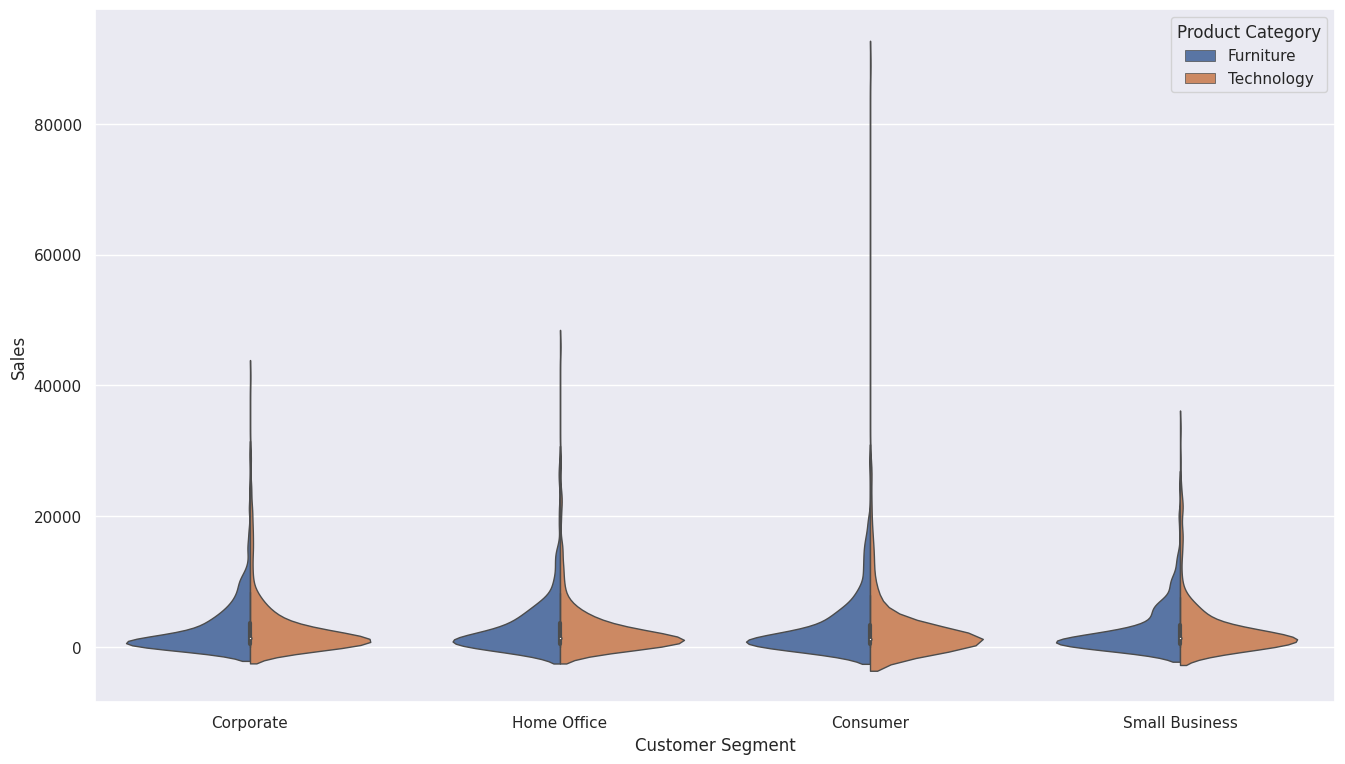

In [13]:
sns.violinplot(
    data=superstore_data[(superstore_data['Product Category'] == 'Technology') | (superstore_data['Product Category'] == 'Furniture')], 
    x="Customer Segment", 
    y="Sales", 
    hue="Product Category",
    split=True, 
    linewidth=1
)